   # Malaria Detection of Creating CNN using Scratch & Transfer Learning

In [2]:
# import the required libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
# resize all the images to below mentioned size
IMAGE_SIZE = [224, 224]

train_path = "Dataset/Train"
valid_path = "Dataset/Test"

In [5]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
# Don't train existing weights

for layer in vgg19.layers:
    layer.trainable = False

In [8]:
# Useful for getting number of output classes

folders = glob('Dataset/Train/*')

In [9]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [10]:
# Our layers - we can add more layers if we want to add

x = Flatten()(vgg19.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object

model = Model(inputs=vgg19.input, outputs=prediction)

In [12]:
# View the structure of the model

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
from tensorflow.keras.layers import MaxPooling2D

In [14]:
### Create a model from scratch using CNN

model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [15]:
# Now tell the model what cost and optimization method to use

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
# Use the Image Data Generator to import the images from the dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size

training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [18]:
training_set

In [19]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [22]:
# Fit the model & Run the cell and It will take some time to execute

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
13/13 [==============================] - 16s 1s/step - loss: 0.2459 - accuracy: 0.9159 - val_loss: 0.6722 - val_accuracy: 0.6567
Epoch 2/50
13/13 [==============================] - 16s 1s/step - loss: 0.1983 - accuracy: 0.9231 - val_loss: 0.6842 - val_accuracy: 0.6418
Epoch 3/50
13/13 [==============================] - 16s 1s/step - loss: 0.1810 - accuracy: 0.9375 - val_loss: 0.4547 - val_accuracy: 0.7910
Epoch 4/50
13/13 [==============================] - 16s 1s/step - loss: 0.1756 - accuracy: 0.9303 - val_loss: 0.4674 - val_accuracy: 0.7910
Epoch 5/50
13/13 [==============================] - 16s 1s/step - loss: 0.1717 - accuracy: 0.9519 - val_loss: 0.4639 - val_accuracy: 0.7836
Epoch 6/50
13/13 [==============================] - 16s 1s/step - loss: 0.1291 - accuracy: 0.9543 - val_loss: 0.7519 - val_accuracy: 0.6642
Epoch 7/50
13/13 [==============================] - 16s 1s/step - loss: 0.1565 - accuracy: 0.9495 - val_loss: 0.6140 - val_accuracy: 0.7537
Epoch 8/50
13/13 [==

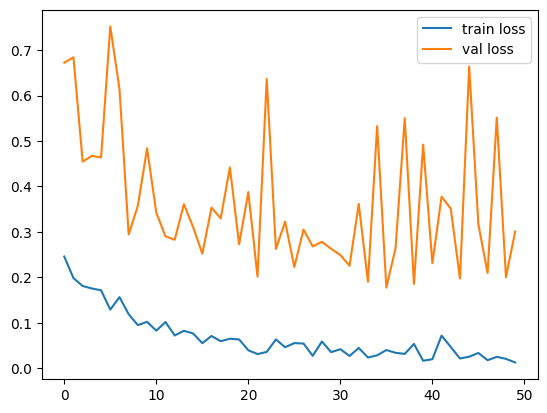

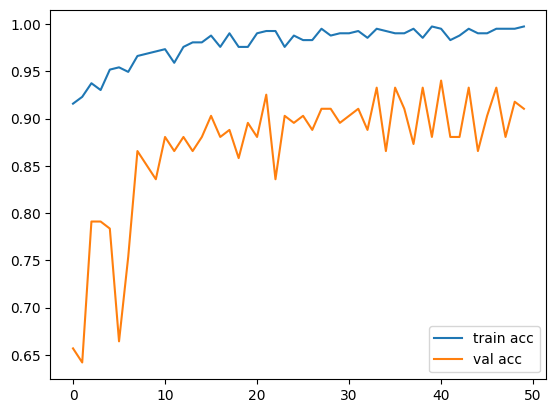

<Figure size 640x480 with 0 Axes>

In [23]:
# Plot the loss values

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy values

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [24]:
# Save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [25]:
y_pred = model.predict(test_set)

5/5 [==============================] - 1s 203ms/step


In [26]:
y_pred

array([[3.5539772e-02, 9.6446025e-01],
       [1.0000000e+00, 3.8211409e-12],
       [3.3221257e-04, 9.9966776e-01],
       [9.9995351e-01, 4.6531208e-05],
       [8.1885678e-01, 1.8114318e-01],
       [7.3084631e-04, 9.9926919e-01],
       [9.9999857e-01, 1.4533347e-06],
       [5.3964417e-02, 9.4603556e-01],
       [3.3012502e-02, 9.6698749e-01],
       [1.8504679e-02, 9.8149532e-01],
       [9.7444284e-01, 2.5557192e-02],
       [8.3509430e-02, 9.1649055e-01],
       [1.0000000e+00, 7.3296609e-09],
       [6.6398515e-04, 9.9933594e-01],
       [4.3727434e-03, 9.9562728e-01],
       [1.0664139e-03, 9.9893361e-01],
       [1.0000000e+00, 4.3621475e-09],
       [1.0000000e+00, 1.7391788e-12],
       [9.9998987e-01, 1.0138709e-05],
       [9.9999976e-01, 1.8020218e-07],
       [9.9994063e-01, 5.9371945e-05],
       [1.0000000e+00, 6.2885822e-11],
       [1.8065615e-03, 9.9819344e-01],
       [6.9401704e-02, 9.3059826e-01],
       [9.2431465e-03, 9.9075681e-01],
       [5.0061065e-01, 4.

In [27]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [28]:
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [30]:
model = load_model("model_vgg19.h5")

In [31]:
img = image.load_img("Dataset/Test/Uninfected/2.png", target_size=(224,224))

In [32]:
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [33]:
x.shape

(224, 224, 3)

In [34]:
x = x/255

In [35]:
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [36]:
model.predict(img_data)

1/1 [==============================] - 0s 110ms/step


array([[1., 0.]], dtype=float32)

In [37]:
a = np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 50ms/step


In [38]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
